# Evaluation Project phase-2

Loan Application Status Prediction

In [85]:
# importing libraries
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [86]:
df=pd.read_csv("Loan status.csv")

In [87]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


# Exploratory Data Analysis

In [88]:
df.shape

(614, 13)

In [89]:
df.sample(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
462,LP002487,Male,Yes,0,Graduate,No,3015,2188.0,153.0,360.0,1.0,Rural,Y
41,LP001120,Male,No,0,Graduate,No,1800,1213.0,47.0,360.0,1.0,Urban,Y
350,LP002139,Male,Yes,0,Graduate,No,9083,0.0,228.0,360.0,1.0,Semiurban,Y
394,LP002266,Male,Yes,2,Graduate,No,3100,1400.0,113.0,360.0,1.0,Urban,Y
291,LP001938,Male,Yes,2,Graduate,No,4400,0.0,127.0,360.0,0.0,Semiurban,N
555,LP002792,Male,Yes,1,Graduate,No,5468,1032.0,26.0,360.0,1.0,Semiurban,Y
168,LP001579,Male,No,0,Graduate,No,2237,0.0,63.0,480.0,0.0,Semiurban,N
275,LP001900,Male,Yes,1,Graduate,No,2750,1842.0,115.0,360.0,1.0,Semiurban,Y
537,LP002738,Male,No,2,Graduate,No,3617,0.0,107.0,360.0,1.0,Semiurban,Y
31,LP001095,Male,No,0,Graduate,No,3167,0.0,74.0,360.0,1.0,Urban,N


In [90]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [91]:
df.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


In [92]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [93]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


# checking for null/nan values

In [94]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

<Axes: >

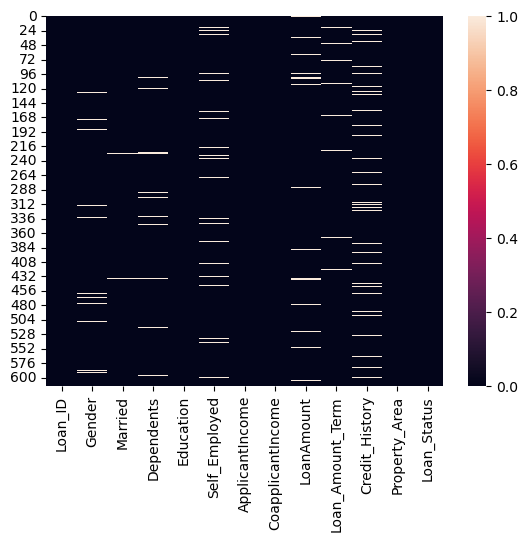

In [95]:
sns.heatmap(df.isnull())

In [96]:
numerical_columns=[]

for i in df.dtypes.index:
    if df.dtypes[i]!="object":
        numerical_columns.append(i)
print("numerical_columns:",numerical_columns)


cat_columns=[]

for j in df.dtypes.index:
    if df.dtypes[j]=="object":
        cat_columns.append(j)
print("catagorical_columns:",cat_columns)



numerical_columns: ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']
catagorical_columns: ['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']


# Filling null values with mean

In [97]:
# replacing null by mean in numerical_columns

df["LoanAmount"]=df["LoanAmount"].fillna(df["LoanAmount"].mean())
df["Loan_Amount_Term"]=df["Loan_Amount_Term"].fillna(df["Loan_Amount_Term"].mean())
df["Credit_History"]=df["Credit_History"].fillna(df["Credit_History"].mean())

    
    
    

In [98]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

replacing null values from catogorical_columns by previous value

In [99]:
df.fillna(method='ffill', axis=0,inplace=True)
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [100]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.000000,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.000000,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.000000,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.000000,360.0,1.0,Urban,Y


In [101]:
df.nunique()

Loan_ID              614
Gender                 2
Married                2
Dependents             4
Education              2
Self_Employed          2
ApplicantIncome      505
CoapplicantIncome    287
LoanAmount           204
Loan_Amount_Term      11
Credit_History         3
Property_Area          3
Loan_Status            2
dtype: int64

# Graphical analysis

# Checking by heatmap 

<Axes: >

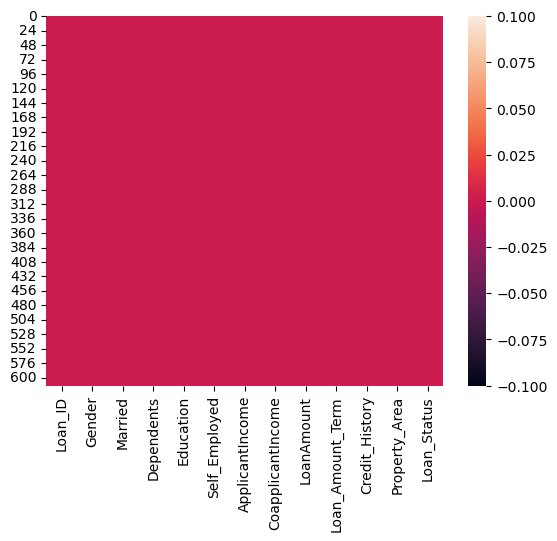

In [102]:
sns.heatmap(df.isnull())

<Axes: xlabel='Gender', ylabel='count'>

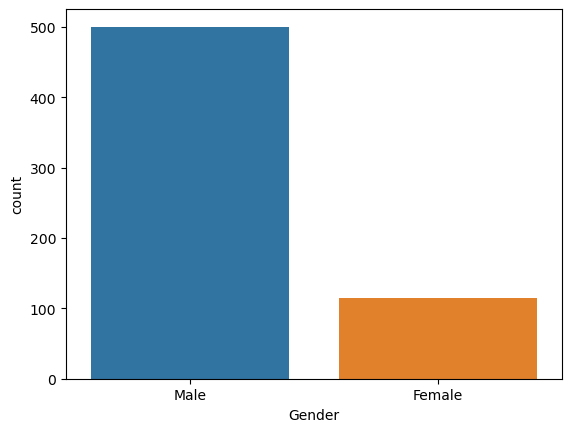

In [103]:

sns.countplot(data=df,x='Gender')

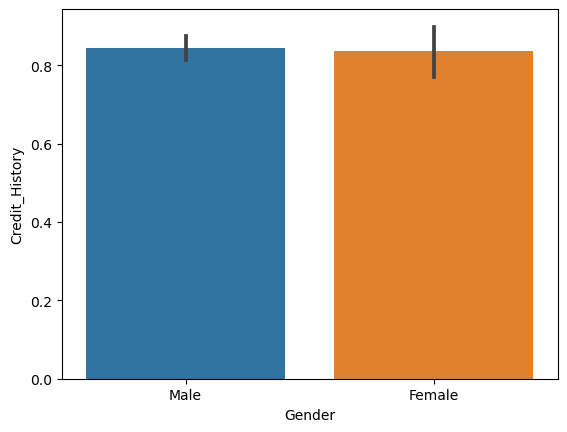

In [104]:
sns.barplot(data=df,x='Gender',y="Credit_History")
plt.show()

<Axes: xlabel='ApplicantIncome', ylabel='Self_Employed'>

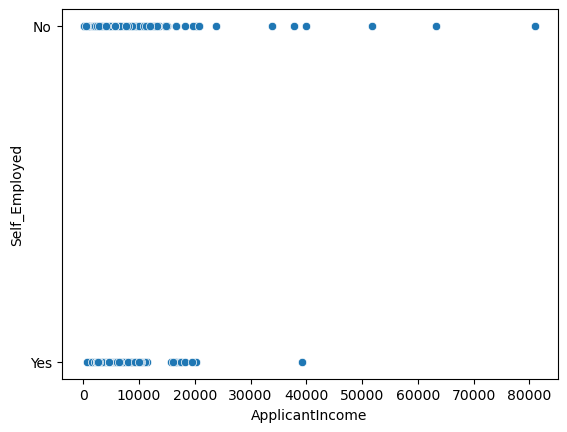

In [105]:
sns.scatterplot(data=df,y="Self_Employed",x='ApplicantIncome',palette='bright')

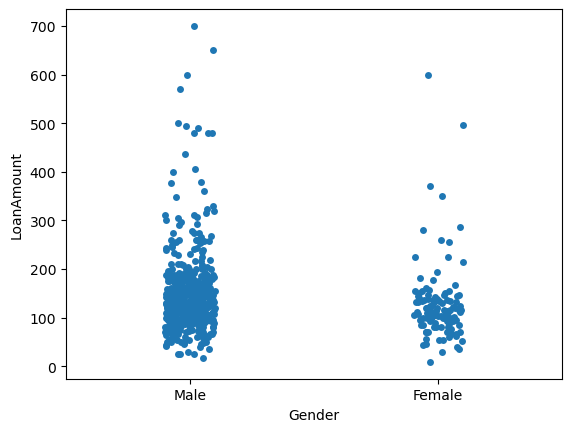

In [106]:
sns.stripplot(data=df,x='Gender',y='LoanAmount')
plt.show()

<Figure size 1200x400 with 0 Axes>

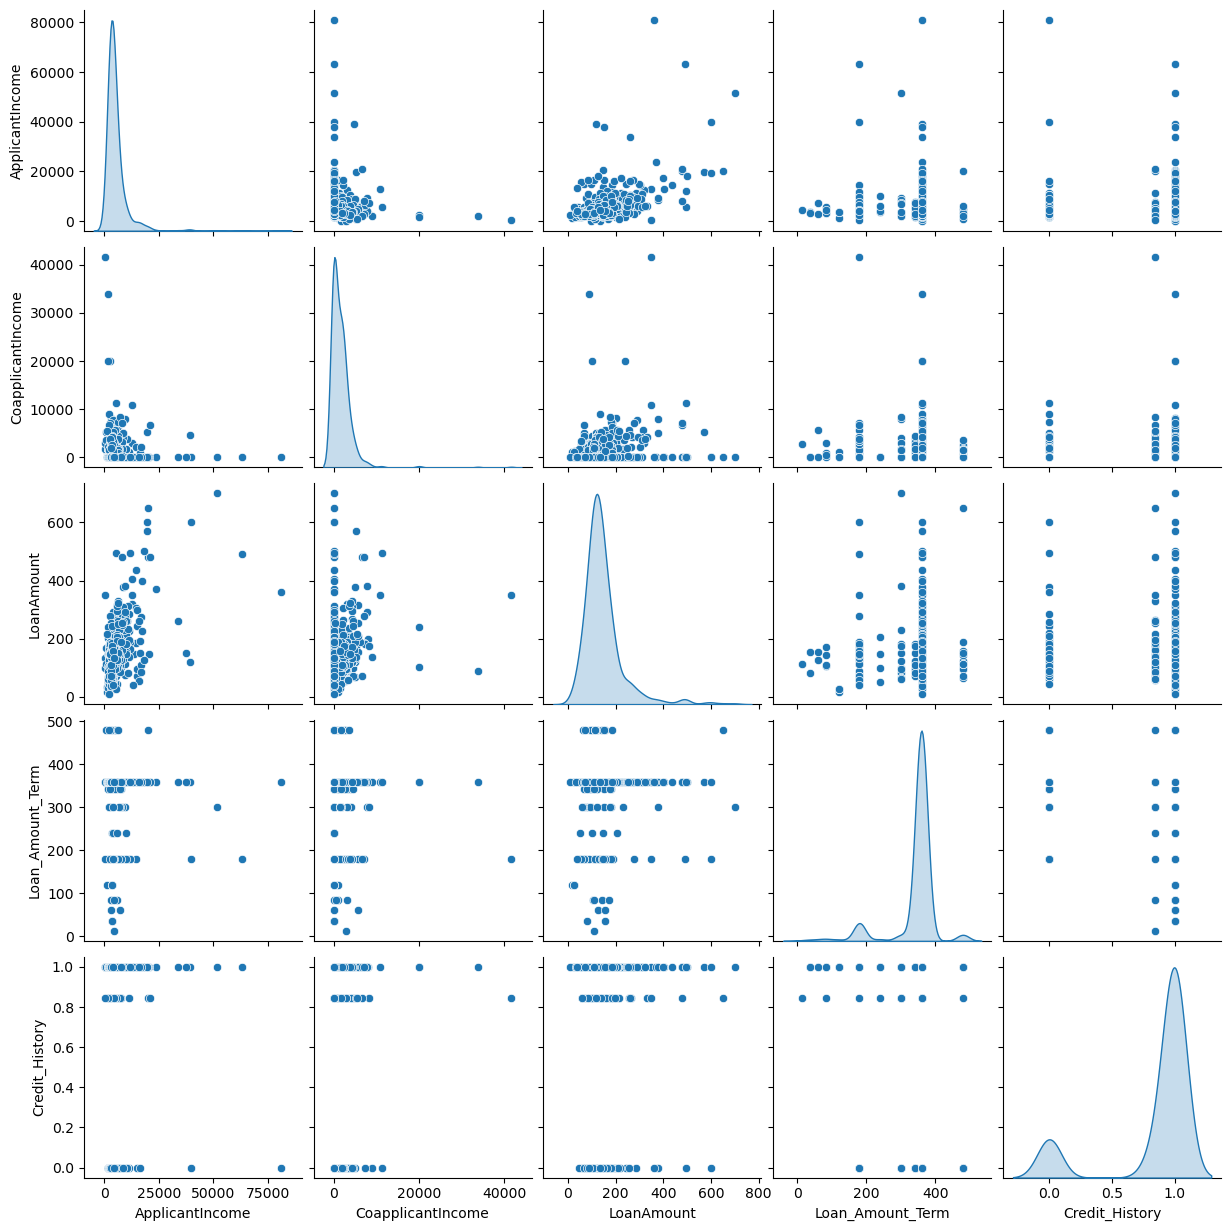

In [107]:
plt.figure(figsize=(12,4))
sns.pairplot(data=df,diag_kind="kde",palette='Dark2')
plt.show()

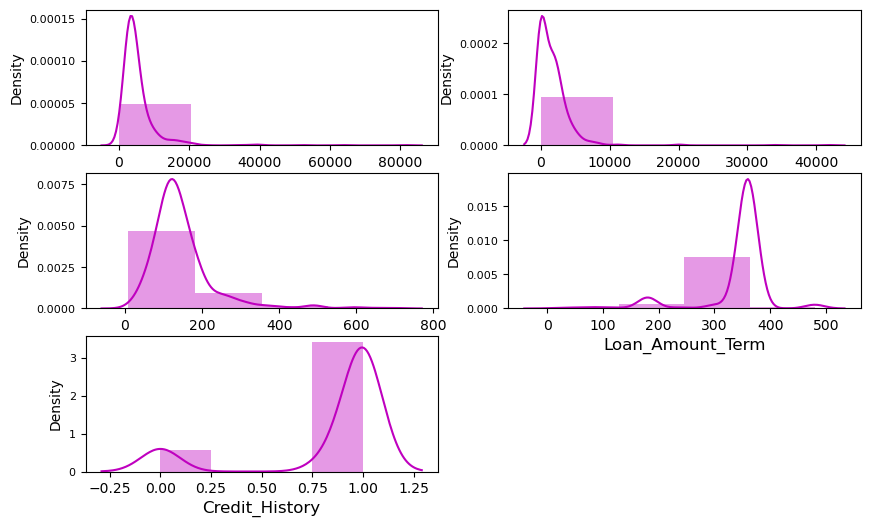

In [108]:
plt.figure(figsize=(10,6),facecolor = 'white')
plotnumber=1

for col in numerical_columns:
    if plotnumber<=6:
        ax=plt.subplot(3,2, plotnumber)
        sns.distplot(df[col], bins=4,color='m')
        plt.xlabel(col,fontsize=12)
        plt.yticks(rotation=0,fontsize=8)
        
    plotnumber+=1
    
plt.show()
        

        

In [109]:
# Encoding Catagorical_columns

In [110]:
# transforming catagorical columns into numerical
from sklearn.preprocessing import OrdinalEncoder
OE=OrdinalEncoder()

for i in df.columns:
    if df[i].dtypes=='object':
        df[i] = OE.fit_transform(df[i].values.reshape(-1,1))
        
df
    
    

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0.0,1.0,0.0,0.0,0.0,0.0,5849,0.0,146.412162,360.0,1.0,2.0,1.0
1,1.0,1.0,1.0,1.0,0.0,0.0,4583,1508.0,128.000000,360.0,1.0,0.0,0.0
2,2.0,1.0,1.0,0.0,0.0,1.0,3000,0.0,66.000000,360.0,1.0,2.0,1.0
3,3.0,1.0,1.0,0.0,1.0,0.0,2583,2358.0,120.000000,360.0,1.0,2.0,1.0
4,4.0,1.0,0.0,0.0,0.0,0.0,6000,0.0,141.000000,360.0,1.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,609.0,0.0,0.0,0.0,0.0,0.0,2900,0.0,71.000000,360.0,1.0,0.0,1.0
610,610.0,1.0,1.0,3.0,0.0,0.0,4106,0.0,40.000000,180.0,1.0,0.0,1.0
611,611.0,1.0,1.0,1.0,0.0,0.0,8072,240.0,253.000000,360.0,1.0,2.0,1.0
612,612.0,1.0,1.0,2.0,0.0,0.0,7583,0.0,187.000000,360.0,1.0,2.0,1.0


# Checking for skewness

In [111]:
df.skew()

Loan_ID              0.000000
Gender              -1.620738
Married             -0.637293
Dependents           0.976422
Education            1.367622
Self_Employed        2.079309
ApplicantIncome      6.539513
CoapplicantIncome    7.491531
LoanAmount           2.726601
Loan_Amount_Term    -2.389680
Credit_History      -1.963600
Property_Area       -0.066196
Loan_Status         -0.809998
dtype: float64

<Axes: >

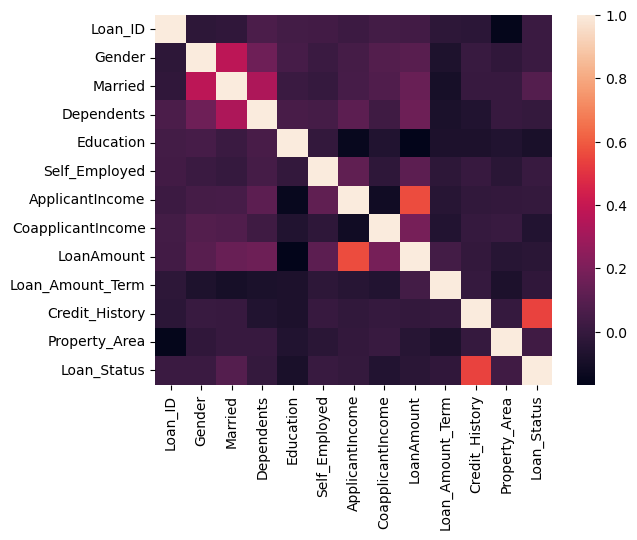

In [112]:
# before removing outliers checking correlation
sns.heatmap(df.corr())

In [113]:
# removing skewness
df['ApplicantIncome']= np.cbrt(df['ApplicantIncome'])
df['LoanAmount']= np.cbrt(df['LoanAmount'])
df['Loan_Amount_Term']= np.sqrt(df['Loan_Amount_Term'])
df['CoapplicantIncome']= np.cbrt(df['CoapplicantIncome'])

In [114]:
df.skew()

Loan_ID              0.000000
Gender              -1.620738
Married             -0.637293
Dependents           0.976422
Education            1.367622
Self_Employed        2.079309
ApplicantIncome      2.083638
CoapplicantIncome    0.196726
LoanAmount           0.832841
Loan_Amount_Term    -3.175195
Credit_History      -1.963600
Property_Area       -0.066196
Loan_Status         -0.809998
dtype: float64

In [115]:
cor=df.corr()

In [116]:
# checking correlation betweeen target and features
cor['Loan_Status'].sort_values(ascending=False)

Loan_Status          1.000000
Credit_History       0.540483
Married              0.089072
CoapplicantIncome    0.033582
Property_Area        0.032112
Gender               0.012213
Loan_ID              0.011773
Self_Employed        0.009035
ApplicantIncome      0.004341
Dependents          -0.003361
Loan_Amount_Term    -0.013791
LoanAmount          -0.042714
Education           -0.085884
Name: Loan_Status, dtype: float64

# Detecting outlier through Boxplot

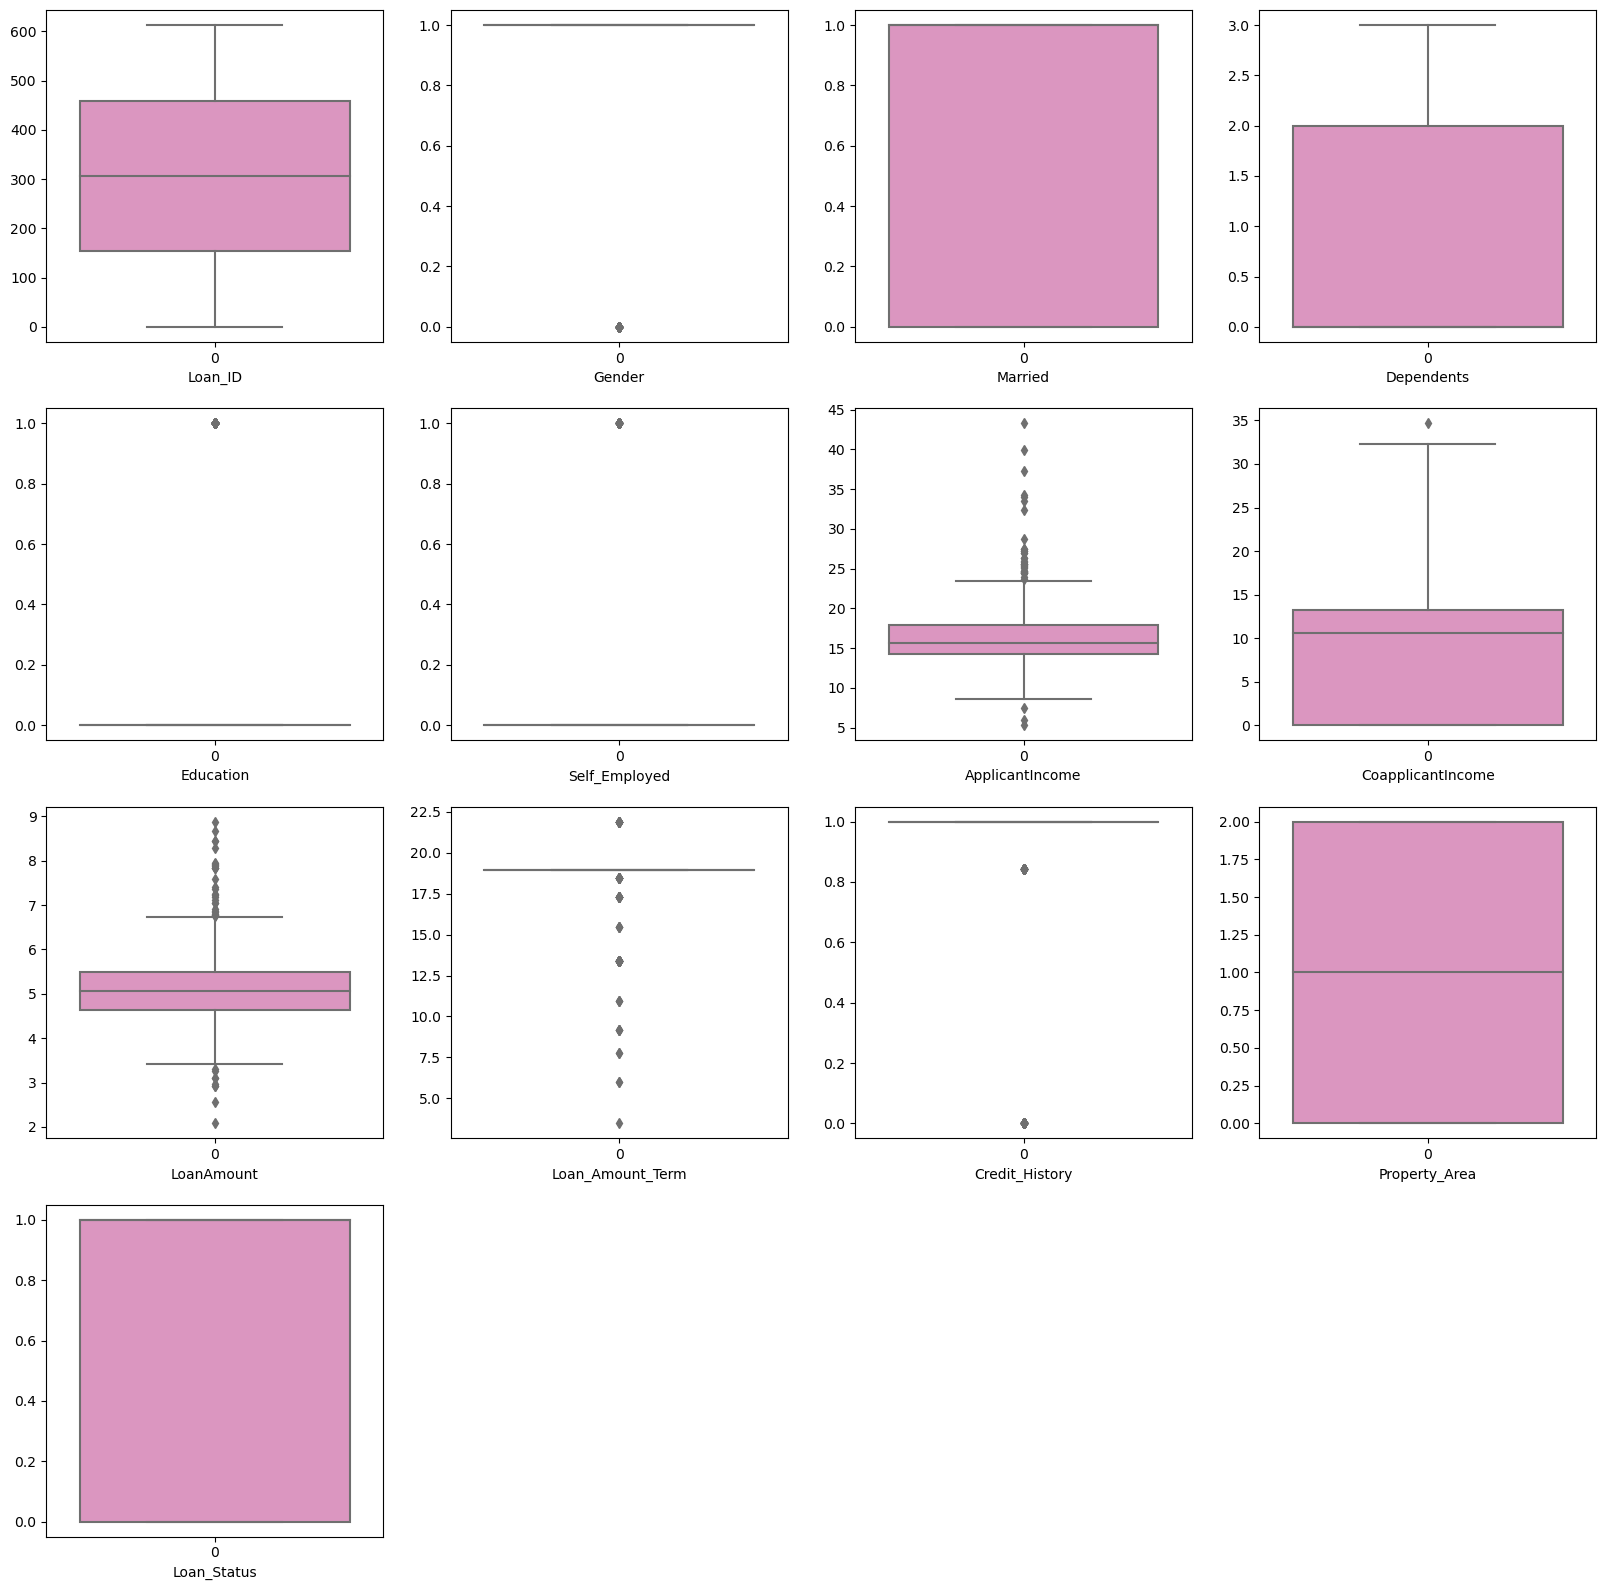

In [117]:
## lets check outliers by ploting boxplot

plt.figure(figsize=(20,25))
p=1
for i in df:
    if p<=13:
        plt.subplot(5,4,p)
        sns.boxplot(df[i], palette= "Set2_r")
        plt.xlabel(i)
       
    p+=1
    
plt.show()

In [118]:
from scipy.stats import zscore
out_features= df[['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History']]
z=np.abs(zscore(out_features))

z

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,0.380325,1.053225,0.169528,0.284121,0.451640
1,0.022870,0.561256,0.100752,0.284121,0.451640
2,0.533028,1.053225,1.269462,0.284121,0.451640
3,0.711341,0.820678,0.226303,0.284121,0.451640
4,0.419383,1.053225,0.092554,0.284121,0.451640
...,...,...,...,...,...
609,0.574203,1.053225,1.152903,0.284121,0.451640
610,0.128936,1.053225,1.996700,2.337198,0.451640
611,0.899211,0.178302,1.403404,0.284121,0.451640
612,0.794146,1.053225,0.693799,0.284121,0.451640


In [119]:
np.where(z>3)

(array([ 14,  68,  94, 126, 130, 133, 155, 155, 171, 171, 177, 183, 185,
        242, 262, 308, 313, 333, 333, 369, 409, 443, 487, 495, 497, 506,
        523, 546, 561, 568, 575, 581, 585, 600, 604], dtype=int64),
 array([3, 3, 3, 0, 2, 3, 0, 2, 0, 2, 2, 0, 0, 3, 3, 2, 3, 0, 2, 2, 0, 0,
        2, 3, 3, 2, 2, 3, 2, 2, 3, 1, 3, 1, 2], dtype=int64))

In [120]:
#removing data above z score
df1= df[(z<3).all(axis=1)]
df1

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0.0,1.0,0.0,0.0,0.0,0.0,18.017473,0.000000,5.270588,18.973666,1.0,2.0,1.0
1,1.0,1.0,1.0,1.0,0.0,0.0,16.610522,11.467457,5.039684,18.973666,1.0,0.0,0.0
2,2.0,1.0,1.0,0.0,0.0,1.0,14.422496,0.000000,4.041240,18.973666,1.0,2.0,1.0
3,3.0,1.0,1.0,0.0,1.0,0.0,13.720654,13.310098,4.932424,18.973666,1.0,2.0,1.0
4,4.0,1.0,0.0,0.0,0.0,0.0,18.171206,0.000000,5.204828,18.973666,1.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,609.0,0.0,0.0,0.0,0.0,0.0,14.260431,0.000000,4.140818,18.973666,1.0,0.0,1.0
610,610.0,1.0,1.0,3.0,0.0,0.0,16.013010,0.000000,3.419952,13.416408,1.0,0.0,1.0
611,611.0,1.0,1.0,1.0,0.0,0.0,20.059821,6.214465,6.324704,18.973666,1.0,2.0,1.0
612,612.0,1.0,1.0,2.0,0.0,0.0,19.646281,0.000000,5.718479,18.973666,1.0,2.0,1.0


In [121]:
x=df1.drop("Loan_Status",axis=1)
y=df1["Loan_Status"]

In [122]:
# feature scaling using standard scalarization
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()
x = pd.DataFrame(sc.fit_transform(x), columns = x.columns)

x

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,-1.724252,0.474619,-1.361228,-0.741190,-0.538949,-0.396305,0.593212,-1.085906,0.280936,0.253328,0.454090,1.233480
1,-1.718581,0.474619,0.734631,0.262002,-0.538949,-0.396305,0.138031,0.577354,-0.043918,0.253328,0.454090,-1.307708
2,-1.712910,0.474619,0.734631,-0.741190,-0.538949,2.523309,-0.569845,-1.085906,-1.448607,0.253328,0.454090,1.233480
3,-1.707239,0.474619,0.734631,-0.741190,1.855464,-0.396305,-0.796907,0.844614,-0.194819,0.253328,0.454090,1.233480
4,-1.701567,0.474619,-1.361228,-0.741190,-0.538949,-0.396305,0.642948,-1.085906,0.188420,0.253328,0.454090,1.233480
...,...,...,...,...,...,...,...,...,...,...,...,...
577,1.729534,-2.106953,-1.361228,-0.741190,-0.538949,-0.396305,-0.622277,-1.085906,-1.308513,0.253328,0.454090,-1.307708
578,1.735205,0.474619,0.734631,2.268386,-0.538949,-0.396305,-0.055277,-1.085906,-2.322684,-3.352223,0.454090,-1.307708
579,1.740876,0.474619,0.734631,0.262002,-0.538949,-0.396305,1.253958,-0.184549,1.763948,0.253328,0.454090,1.233480
580,1.746547,0.474619,0.734631,1.265194,-0.538949,-0.396305,1.120169,-1.085906,0.911064,0.253328,0.454090,1.233480


# Variance Inflation Factor

In [123]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif= pd.DataFrame()
vif["Vifvalues"]= [variance_inflation_factor(x.values, i) for i in range(len(x.columns))]
vif["Features"]= x.columns

vif

,Vifvalues,Features
0,1.044436,Loan_ID
1,1.227283,Gender
2,1.403953,Married
3,1.176254,Dependents
4,1.076736,Education
5,1.057730,Self_Employed
6,1.864506,ApplicantIncome
7,1.592955,CoapplicantIncome
8,1.660824,LoanAmount
9,1.057634,Loan_Amount_Term


Note: here we can clearly see there is no value exceeding limits for vif values

Now our Data is Balanced and clean 

# Finding best Random State

In [124]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
maxAccu = 0
maxRS = 0

for i in range(1,200):
    x_train,x_test, y_train, y_test = train_test_split(x,y, test_size = 0.30, random_state = 1)
    RFR = RandomForestClassifier()
    RFR.fit(x_train, y_train)
    pred= RFR.predict(x_test)
    acc= accuracy_score(y_test,pred)
    
    if acc>maxAccu:
        maxAccu=acc
        maxRS = i
        
print("best accuracy is ", maxAccu, "at random_state", maxRS)

best accuracy is  0.8171428571428572 at random_state 97


In [125]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import r2_score

maxAccu = 0
maxRS = 0

for i in range(1,200):
    x_train,x_test, y_train, y_test = train_test_split(x,y, test_size = 0.30, random_state = 1)
    gsb = GradientBoostingClassifier()
    gsb.fit(x_train, y_train)
    pred= gsb.predict(x_test)
    acc= accuracy_score(y_test,pred)
    
    if acc>maxAccu:
        maxAccu=acc
        maxRS = i
        
print("best accuracy is ", maxAccu, "at random_state", maxRS)

best accuracy is  0.8 at random_state 6


In [126]:
from sklearn.ensemble import AdaBoostClassifier

maxAccu = 0
maxRS = 0

for i in range(1,200):
    x_train,x_test, y_train, y_test = train_test_split(x,y, test_size = 0.30, random_state = 1)
    ad = GradientBoostingClassifier()
    ad.fit(x_train, y_train)
    pred= ad.predict(x_test)
    acc= accuracy_score(y_test,pred)
    
    if acc>maxAccu:
        maxAccu=acc
        maxRS = i
        
print("best accuracy is ", maxAccu*100,'%', "at random_state", maxRS)

best accuracy is  80.0 % at random_state 1


In [127]:
from sklearn.ensemble import ExtraTreesClassifier

maxAccu = 0
maxRS = 0

for i in range(1,200):
    x_train,x_test, y_train, y_test = train_test_split(x,y, test_size = 0.30, random_state = 1)
    etc = GradientBoostingClassifier()
    etc.fit(x_train, y_train)
    pred= etc.predict(x_test)
    acc= accuracy_score(y_test,pred)
    
    if acc>maxAccu:
        maxAccu=acc
        maxRS = i
        
print("best accuracy is ", maxAccu*100,'%', "at random_state", maxRS)

best accuracy is  80.0 % at random_state 1


Note:- we are getting almost same accuracy with random states ,
    but we are taking 2 as it is repeated

In [128]:
x_train

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
110,-1.083402,-2.106953,-1.361228,0.262002,-0.538949,2.523309,1.083072,-1.085906,0.280936,0.253328,0.454090,-0.037114
505,1.275834,0.474619,-1.361228,-0.741190,1.855464,-0.396305,0.888294,-1.085906,-0.007180,0.253328,0.454090,-0.037114
419,0.754080,0.474619,0.734631,-0.741190,-0.538949,-0.396305,-1.019870,0.422589,0.280936,0.253328,0.454090,1.233480
512,1.315533,0.474619,0.734631,-0.741190,-0.538949,-0.396305,0.686069,1.198310,2.528702,0.253328,0.454090,1.233480
335,0.266353,0.474619,-1.361228,-0.741190,-0.538949,-0.396305,1.430798,1.248094,2.366950,0.253328,0.454090,-1.307708
...,...,...,...,...,...,...,...,...,...,...,...,...
129,-0.958635,0.474619,0.734631,2.268386,-0.538949,-0.396305,-0.100247,1.784392,2.178136,0.253328,0.454090,-0.037114
144,-0.873566,0.474619,-1.361228,-0.741190,-0.538949,-0.396305,0.732059,-1.085906,-0.233587,0.253328,-2.384551,-1.307708
72,-1.304580,0.474619,0.734631,2.268386,-0.538949,2.523309,0.392724,0.669905,0.911064,0.253328,0.454090,-0.037114
235,-0.323456,0.474619,0.734631,0.262002,1.855464,-0.396305,0.835168,-1.085906,0.118510,-3.352223,0.454090,1.233480


# Model Building

In [129]:
x_train,x_test, y_train, y_test = train_test_split(x,y, test_size = 0.30, random_state = 7)

In [130]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [131]:
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso,Ridge

In [132]:
LR=LinearRegression()
LR.fit(x_train,y_train)
pred_LR= LR.predict(x_test)
pred_train=LR.predict(x_train)
print(LR)
print('r2_score:',r2_score(y_test,pred_LR)*100)
print('r2_score on training data:',r2_score(y_train,pred_train)*100)
print('Mean absolute error:',mean_absolute_error(y_test,pred_LR))
print('Mean squared error:',mean_squared_error(y_test,pred_LR))
print('Root Mean squared error:',np.sqrt(mean_squared_error(y_test,pred_LR)))

LinearRegression()
r2_score: 27.282230354497237
r2_score on training data: 35.34457593007127
Mean absolute error: 0.29473900211143855
Mean squared error: 0.15970603057490665
Root Mean squared error: 0.3996323692781988


In [133]:
rfr=RandomForestRegressor()
rfr.fit(x_train,y_train)
pred_rfr= rfr.predict(x_test)
pred_train=rfr.predict(x_train)
print(rfr)
print('r2_score:',r2_score(y_test,pred_rfr)*100)
print('r2_score on training data:',r2_score(y_train,pred_train)*100)
print('Mean absolute error:',mean_absolute_error(y_test,pred_rfr))
print('Mean squared error:',mean_squared_error(y_test,pred_rfr))
print('Root Mean squared error:',np.sqrt(mean_squared_error(y_test,pred_rfr)))

RandomForestRegressor()
r2_score: 23.167818911686012
r2_score on training data: 90.29232995534181
Mean absolute error: 0.2989142857142857
Mean squared error: 0.1687422857142857
Root Mean squared error: 0.41078252849200597


In [134]:
rd=Ridge()
rd.fit(x_train,y_train)
pred_rd= rd.predict(x_test)
pred_train=rd.predict(x_train)
print(rd)
print('r2_score:',r2_score(y_test,pred_rd)*100)
print('r2_score on training data:',r2_score(y_train,pred_train)*100)
print('Mean absolute error:',mean_absolute_error(y_test,pred_rd))
print('Mean squared error:',mean_squared_error(y_test,pred_rd))
print('Root Mean squared error:',np.sqrt(mean_squared_error(y_test,pred_rd)))

Ridge()
r2_score: 27.30774202662156
r2_score on training data: 35.34433490278983
Mean absolute error: 0.29493179822533316
Mean squared error: 0.15965000069516522
Root Mean squared error: 0.39956226135004946


In [135]:
knn=KNN()
knn.fit(x_train,y_train)
pred_knn= knn.predict(x_test)
pred_train=knn.predict(x_train)
print(knn)
print('r2_score:',r2_score(y_test,pred_knn)*100)
print('r2_score on training data:',r2_score(y_train,pred_train)*100)
print('Mean absolute error:',mean_absolute_error(y_test,pred_knn))
print('Mean squared error:',mean_squared_error(y_test,pred_knn))
print('Root Mean squared error:',np.sqrt(mean_squared_error(y_test,pred_knn)))

KNeighborsRegressor()
r2_score: 13.931013975617024
r2_score on training data: 45.56555593724953
Mean absolute error: 0.30057142857142854
Mean squared error: 0.1890285714285714
Root Mean squared error: 0.43477416140862307


In [136]:
dtc=DecisionTreeRegressor()
dtc.fit(x_train,y_train)
pred_dtc= dtc.predict(x_test)
pred_train=dtc.predict(x_train)
print(dtc)
print('r2_score:',r2_score(y_test,pred_dtc)*100)
print('r2_score on training data:',r2_score(y_train,pred_train)*100)
print('Mean absolute error:',mean_absolute_error(y_test,pred_dtc))
print('Mean squared error:',mean_squared_error(y_test,pred_dtc))
print('Root Mean squared error:',np.sqrt(mean_squared_error(y_test,pred_dtc)))

DecisionTreeRegressor()
r2_score: -35.295866785608055
r2_score on training data: 100.0
Mean absolute error: 0.29714285714285715
Mean squared error: 0.29714285714285715
Root Mean squared error: 0.5451081150953975


In [139]:
from sklearn.model_selection import GridSearchCV

In [140]:
param={'alpha':[1.0,.05,.4,2],'fit_intercept':[True,False],'solver':['auto','svd','cholesky','lsqr','sag','saga','lbfgs'],'positive':[False,True],'random_state':[1,4,10,20]
      
      }
gscv=GridSearchCV(Ridge(),param,cv=5)
gscv.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1.0, 0.05, 0.4, 2],
                         'fit_intercept': [True, False],
                         'positive': [False, True],
                         'random_state': [1, 4, 10, 20],
                         'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sag',
                                    'saga', 'lbfgs']})

In [141]:
gscv.best_params_

{'alpha': 2,
 'fit_intercept': True,
 'positive': False,
 'random_state': 4,
 'solver': 'sag'}

In [142]:
Model=Ridge(alpha=.05,fit_intercept=True,positive=False,random_state=1,solver='lsqr')

In [143]:
Model.fit(x_train,y_train)
pred=Model.predict(x_test)
print('r2_score:',r2_score(y_test,pred))
print('Mean absolute error:',mean_absolute_error(y_test,pred))
print('Mean squared error:',mean_squared_error(y_test,pred))
print('Root Mean squared error:',np.sqrt(mean_squared_error(y_test,pred)))

r2_score: 0.2728149156819054
Mean absolute error: 0.2947473808203446
Mean squared error: 0.15970765313056343
Root Mean squared error: 0.399634399333395


In [144]:
import joblib

In [145]:
import pickle
filename='Teslastock.pkl'
pickle.dump(Model,open(filename,'wb')) # saved model

In [146]:
import pickle

loaded_model=pickle.load(open('TeslaStock.pkl','rb'))
result=loaded_model.score(x_test,y_test)
print(result*100)

27.281491568190543


In [147]:
conclusion=pd.DataFrame([loaded_model.predict(x_test)[:],y_test[:]],index=["Predicted","Original"])
conclusion

,0,1,2,3,4,5,6,7,8,9,...,165,166,167,168,169,170,171,172,173,174
Predicted,0.937585,0.818647,0.872781,0.824074,0.104392,0.765121,0.865892,0.972621,0.750783,0.784892,...,0.150816,0.796188,0.824157,-0.097927,0.202941,0.772489,0.759046,0.671178,0.882197,0.751863
Original,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,...,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000


# Findings

Intro- As we can see in our Title , we are here to predict Loan status in the our Dataset named as Loan Application Status Prediction
Loan dataset is a continiousn dataset as it includes both numerical and catagorical columns, so multiple operations performed to clean the dataset


CleaningOperations- In starting changing csv file to DataFrame was the first step taken by us than we made Exploratery Data Analysis on it.
while EDA was in progress we got many null values in multiple columns, null values in numerical columns were replaced by their mean and  in catagorical columns they were replaced by their 
previous values.

in the same way outliers and skew ness was removed as well , skewness was replaced by square root and cube root method and outliers were replaced 
by zscore method